In [208]:
import pandas as pd
import pit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [192]:
import sqlite3
# Connect to the SQLite database
goSales = sqlite3.connect('../go_sales.sqlite')

# Read product table into a DataFrame
returned_item = pd.read_sql_query("SELECT RETURN_CODE, RETURN_DATE, ORDER_DETAIL_CODE, RETURN_REASON_CODE, RETURN_QUANTITY FROM returned_item", goSales)

# Read order_detail table into a DataFrame
orderDetails_df = pd.read_sql_query("SELECT ORDER_DETAIL_CODE, ORDER_NUMBER, PRODUCT_NUMBER, QUANTITY, UNIT_COST, UNIT_SALE_PRICE FROM order_details", goSales)

# Merge the two DataFrames on 'PRODUCT_NUMBER'
merged_df = pd.merge(orderDetails_df, returned_item, on='ORDER_DETAIL_CODE', how='inner')

# Print the merged DataFrame
merged_df

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_SALE_PRICE,RETURN_CODE,RETURN_DATE,RETURN_REASON_CODE,RETURN_QUANTITY
0,100146,8465,15,16,504.54,593.5,1975,9-8-2021 18:45:17,4,16
1,100149,9116,16,64,1.02,2.05,1976,6-7-2021 13:34:59,5,64
2,100199,9113,30,22,6.78,13.57,1979,6-7-2021 07:19:36,4,22
3,100250,9254,43,52,126.51,189.77,2298,14-12-2021 11:28:50,1,6
4,100641,9269,111,6,81.87,180.13,2301,19-12-2021 04:10:53,4,6
...,...,...,...,...,...,...,...,...,...,...
701,99739,9250,15,16,554.59,626.94,1974,9-11-2020 13:32:27,1,2
702,99746,8444,17,34,64.36,90.09,1977,18-8-2020 19:48:51,1,2
703,99807,8440,33,70,19.62,29.44,1980,22-11-2020 13:33:29,1,6
704,99810,9251,34,54,32.02,51.24,1981,17-10-2020 19:48:21,3,54


In [193]:
merged_df = merged_df.loc[:, ['QUANTITY', 'RETURN_QUANTITY', 'RETURN_REASON_CODE', 'PRODUCT_NUMBER', 'UNIT_SALE_PRICE']]
merged_df

,QUANTITY,RETURN_QUANTITY,RETURN_REASON_CODE,PRODUCT_NUMBER,UNIT_SALE_PRICE
0,16,16,4,15,593.5
1,64,64,5,16,2.05
2,22,22,4,30,13.57
3,52,6,1,43,189.77
4,6,6,4,111,180.13
...,...,...,...,...,...
701,16,2,1,15,626.94
702,34,2,1,17,90.09
703,70,6,1,33,29.44
704,54,54,3,34,51.24


In [194]:
merged_df['RETURN_REASON_CODE'] = merged_df['RETURN_REASON_CODE'].astype(str)
merged_df.dtypes

QUANTITY               int64
RETURN_QUANTITY       object
RETURN_REASON_CODE    object
PRODUCT_NUMBER        object
UNIT_SALE_PRICE       object
dtype: object

In [195]:
dummies_dataframe = pd.get_dummies(merged_df.loc[:, ['RETURN_REASON_CODE']])
dummies_dataframe

,RETURN_REASON_CODE_1,RETURN_REASON_CODE_2,RETURN_REASON_CODE_3,RETURN_REASON_CODE_4,RETURN_REASON_CODE_5
0,False,False,False,True,False
1,False,False,False,False,True
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
701,True,False,False,False,False
702,True,False,False,False,False
703,True,False,False,False,False
704,False,False,True,False,False


In [196]:
merged_df = pd.concat([merged_df, dummies_dataframe], axis=1)
merged_df = merged_df.loc[:, ['RETURN_REASON_CODE_1', 'RETURN_REASON_CODE_2', 'RETURN_REASON_CODE_3', 'RETURN_REASON_CODE_4', 'RETURN_REASON_CODE_5', 'QUANTITY', 'RETURN_QUANTITY']]
merged_df

,RETURN_REASON_CODE_1,RETURN_REASON_CODE_2,RETURN_REASON_CODE_3,RETURN_REASON_CODE_4,RETURN_REASON_CODE_5,QUANTITY,RETURN_QUANTITY
0,False,False,False,True,False,16,16
1,False,False,False,False,True,64,64
2,False,False,False,True,False,22,22
3,True,False,False,False,False,52,6
4,False,False,False,True,False,6,6
...,...,...,...,...,...,...,...
701,True,False,False,False,False,16,2
702,True,False,False,False,False,34,2
703,True,False,False,False,False,70,6
704,False,False,True,False,False,54,54


In [205]:
a = merged_df.drop('RETURN_REASON_CODE_1', axis=1)
b = merged_df.loc[:,'RETURN_REASON_CODE_1']
c = merged_df.drop('RETURN_REASON_CODE_2', axis=1)
d = merged_df.loc[:,'RETURN_REASON_CODE_2']
e = merged_df.drop('RETURN_REASON_CODE_3', axis=1)
f = merged_df.loc[:,'RETURN_REASON_CODE_3']
g = merged_df.drop('RETURN_REASON_CODE_4', axis=1)
h = merged_df.loc[:,'RETURN_REASON_CODE_4']
x = merged_df.drop('RETURN_REASON_CODE_5', axis=1)
y = merged_df.loc[:,'RETURN_REASON_CODE_5']

In [206]:
a_train, a_test, b_train, b_test = train_test_split(
    a,
    b,
    test_size=0.15,
    random_state=42
)

c_train, c_test, d_train, d_test = train_test_split(
    c,
    d,
    test_size=0.15,
    random_state=42
)

e_train, e_test, f_train, f_test = train_test_split(
    e,
    f,
    test_size=0.15,
    random_state=42
)

g_train, g_test, h_train, h_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

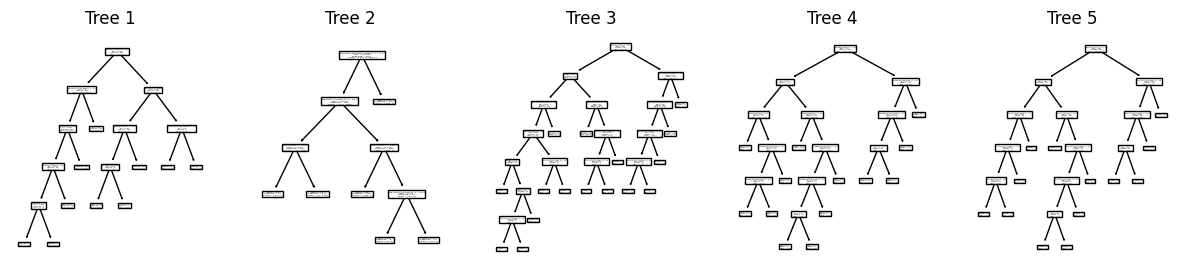

In [217]:
dtree1 = DecisionTreeClassifier()
dtree1 = dtree1.fit(a_train, b_train)
dtree2 = DecisionTreeClassifier()
dtree2 = dtree2.fit(c_train, d_train)
dtree3 = DecisionTreeClassifier()
dtree3 = dtree3.fit(e_train, f_train)
dtree4 = DecisionTreeClassifier()
dtree4 = dtree4.fit(g_train, h_train)
dtree5 = DecisionTreeClassifier()
dtree5 = dtree5.fit(x_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for i, dtree in enumerate([dtree1, dtree2, dtree3, dtree4, dtree5]):
    tree.plot_tree(dtree, ax=axes[i], feature_names=x.columns)
    axes[i].set_title(f"Tree {i+1}")

plt.show()

In [218]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0 : 'Predicted_Return_reason_code'})
model_results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE_5'], predicted_df], axis=1)
model_results_frame

,RETURN_REASON_CODE_5,Predicted_Return_reason_code
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
101,False,False
102,False,False
103,False,False
104,True,True


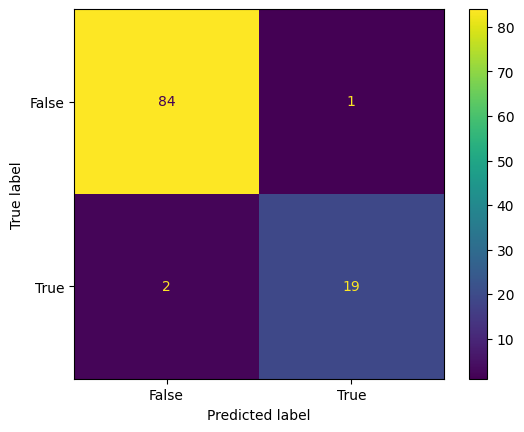

In [219]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_REASON_CODE_5'],model_results_frame['Predicted_Return_reason_code'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [220]:
metrics.accuracy_score(model_results_frame['RETURN_REASON_CODE_5'],model_results_frame['Predicted_Return_reason_code'])

0.9716981132075472